# <center><font color='#000000'>Title:: Understanding The Relation Between Minimum and Maximum Decibel Level<font><a class='anchor' id='top'></a></center>

<div style="text-align: right;">
    <h3>-- Kirthi Chandra, H. Akanksha</h3>
</div>

### Table of Contents
    
* [1. Introduction](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)
	
* [3. Univariate and Bivariate Analysis](#chapter3)

* [4. Linear Regression Algorithm](#chapter4)

* [5. Evaluating the model](#chapter5)

* [6. Conclusion](#chapter6)

## <center>1. Introduction <a class = "anchor" id = "chapter1"></a><center>
    

The exercise investigates the relation between maximum and minimum decibel levels and explores their performance individually using predictive modelling.

**Study Area:**

The site selected is near Assembly Metro Station in Hyderabad, India. In which we have collected maximum and minimum decibel level from 8th March, 2023 to 8th June, 2023.

**Study Duration:**

The research is aimed to measure the sound pressure levels at Assembly metro station on week days during the peak hours which are claimed to be between 9 am and 12 noon and 5 pm and 9 pm according to Deccan Chronicle. | Rachel Dammala Published on: April 23, 2023.Hence the recording is taken between 9:00 AM – 10:30 AM. The recording is taken on the concourse level of the metro station.

**Sensor:**

A mobile application has been used as a part of research, namely “Sound meter.” This Application has been developed in order to measure the Sound Pressure Levels (SPL) in decibels (dB), it is also developed to measure and detect the environment the measurement is been taken in. (The application cautions the users to beware of the errors that could be generated due to inefficiency of the device’s microphone so in order to check the efficiency the application advises one to go to a silent place and ensure the decibels are not more than 30dB. Which has been verified.)

**Factors Affecting Noise Levels:**

The parameters effecting the SPLs are Various Users Groups, traffic on the road, sound of train moving on the platform, sound of operating machines, announcement speaker sound and miscellaneous sounds.

**Research Method:**

Importing the dataset and considering only the relevant data fields by removing the redundant fields like Serial Number, Date, Time, duration and Detected Environment. There are no null values and duplicates in the dataset. The mean of minimum is 63 dB and maximum is 83 db. The outliers are removed as a treatment to make the model more reliable.

Visualising the new dataset with line plots, scatter plot and correlation heatmap just to find that there is a least relation between the two variables. There is no clear relationship between the variables.

**Linear Regression:**

Splitting the data into training and testing with 70:30 ratio and then using Linear Regression algorithm from sklearn library. Fitting the training dataset.

**Outcomes:**

The results of measurements of the sound levels are observed to be averagely minimum of 63.15 dB and averagely maximum as 83.63 db. The environment detected by the application is always “Restaurant” with average range of SPLs as ~70dB.

In summary, the obtained MSE of 8.7314 indicates that there is room for improvement in the model's accuracy, and the negative R2 score of -0.2622 suggests that the model is performing worse than a basic mean prediction model. Further analysis and adjustments may be needed to enhance the model's performance and better understand the relationships between the variables.


## <center>2. Data Health Review <a class = "anchor" id = "chapter2"> </a></center>

### 2.1 Importing Libraries <a class = "anchor" id = "chapter2.1"> </a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 2.2 Importing the Data <a class = "anchor" id = "chapter2.2"></a>

In [2]:
df = pd.read_excel('SOUND LEVELS AT METRO STATION.xlsx')
df.head(3)## 2.2 Importing the Data <a class = "anchor" id = "chapter2.2"></a>

,Sno.,Date,Time,Duration (Sec),Minimum (dB),Maximum (dB),Detected Environment
0,1.0,2023-08-03 00:00:00,09:09:28,30.0,63.3,86.8,Restaurant (~70dB)
1,2.0,13/3/2023,09:20:19,32.0,64.6,86.5,Restaurant (~70dB)
2,3.0,14/3/2023,09:15:53,30.0,66.5,80.9,Restaurant (~70dB)


### 2.3 Data Cleaning and Preprocessing <a class= "anchor" id = "chapter2.3"></a>

**The relevant data fields are minimum decibel and maximum decibel**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sno.                   37 non-null     float64
 1   Date                   37 non-null     object 
 2   Time                   37 non-null     object 
 3   Duration (Sec)         37 non-null     float64
 4   Minimum (dB)           38 non-null     float64
 5   Maximum (dB)           38 non-null     float64
 6   Detected Environment   37 non-null     object 
dtypes: float64(4), object(3)
memory usage: 2.2+ KB


In [4]:
df.columns

Index(['Sno.', 'Date ', 'Time ', 'Duration (Sec)', 'Minimum (dB)',
       'Maximum (dB)', 'Detected Environment '],
      dtype='object')

**Removing the redundant fields like Serial Number, Date, Time, duration and Detected Environment**

In [5]:
df.drop(columns = ['Sno.', 'Date ', 'Time ', 'Duration (Sec)',  'Detected Environment '], inplace = True)

In [6]:
df.head(3)

,Minimum (dB),Maximum (dB)
0,63.3,86.8
1,64.6,86.5
2,66.5,80.9


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Minimum (dB)    0
Maximum (dB)    0
dtype: int64

**There are no duplicates and null values in dataset**

In [9]:
df.describe()

,Minimum (dB),Maximum (dB)
count,38.000000,38.000000
mean,63.156757,83.635135
std,10.217752,2.886803
min,29.500000,78.100000
25%,64.700000,80.900000
50%,66.500000,83.617568
75%,67.800000,86.600000
max,72.900000,87.000000


**The mean of minimum is 63 dB and maximum is 83 dB**

<AxesSubplot:>

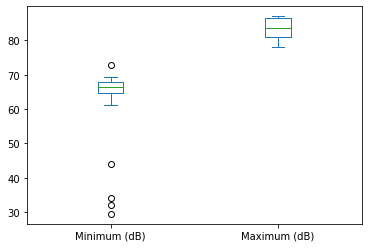

In [10]:
df.plot(kind = 'box')

**There are few outliers and are removed**

In [11]:
df = df[df['Minimum (dB)'] > 55]

In [12]:
df.head()

,Minimum (dB),Maximum (dB)
0,63.3,86.8
1,64.6,86.5
2,66.5,80.9
3,63.2,78.1
4,69.1,80.5


In [13]:
df.shape

(34, 2)

In [14]:
df.columns

Index(['Minimum (dB)', 'Maximum (dB)'], dtype='object')

## <center>3. Univariate and Bivariate Analysis <a class = "anchor" id = "chapter3"> </a></center>

**Visualising the Minimum and Maximum decibel throughout the Dataset**

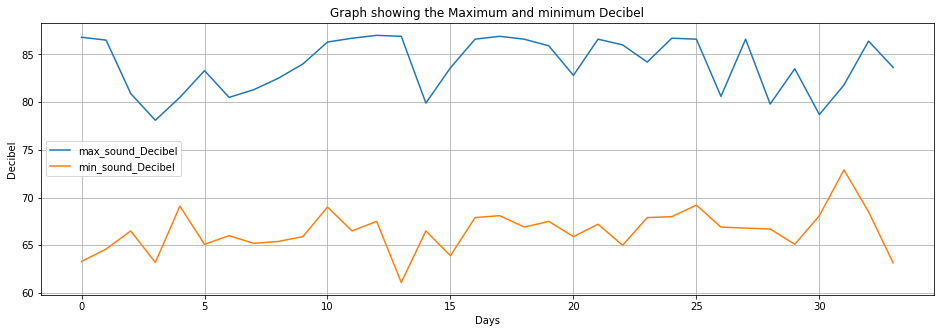

In [15]:
plt.figure(figsize = (16,5))

plt.plot( range(len(df['Minimum (dB)'])), df['Maximum (dB)'])
plt.plot( range(len(df['Minimum (dB)'])), df['Minimum (dB)'])

plt.legend(['max_sound_Decibel', 'min_sound_Decibel'])
plt.xlabel('Days')
plt.ylabel('Decibel')
plt.title('Graph showing the Maximum and minimum Decibel')
plt.grid()
plt.show();

**A Scatter plot shows that there is no relation**

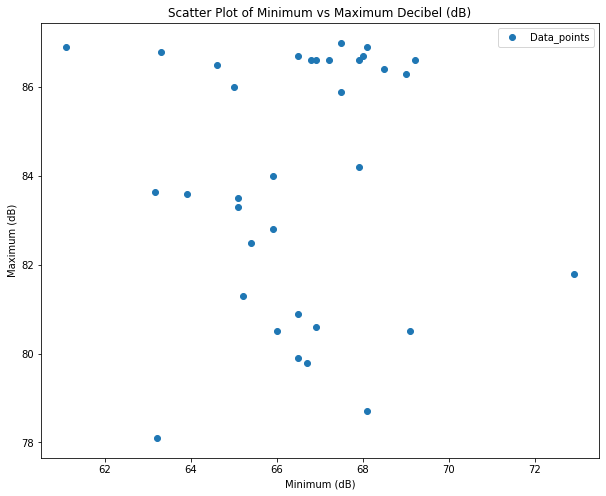

In [16]:
plt.figure(figsize = (10,8))
plt.scatter(data = df, x = 'Minimum (dB)', y = 'Maximum (dB)')


plt.xlabel('Minimum (dB)')
plt.ylabel('Maximum (dB)')
plt.title('Scatter Plot of Minimum vs Maximum Decibel (dB)')
plt.legend(['Data_points'])
plt.show()

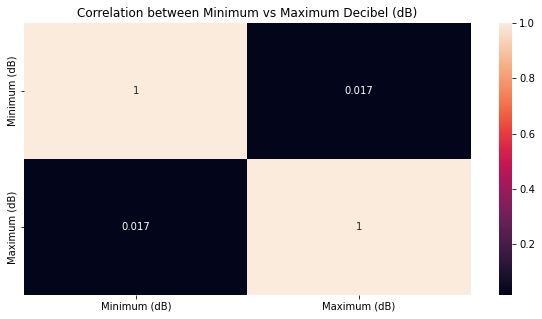

In [17]:
plt.figure(figsize = (10,5))
plt.title('Correlation between Minimum vs Maximum Decibel (dB)')

sns.heatmap(df.corr(), annot = True);

In [18]:
df.corr()

,Minimum (dB),Maximum (dB)
Minimum (dB),1.000000,0.016932
Maximum (dB),0.016932,1.000000


**This indicates a weak or no correlation, meaning that there is no clear linear relationship between the variables.**

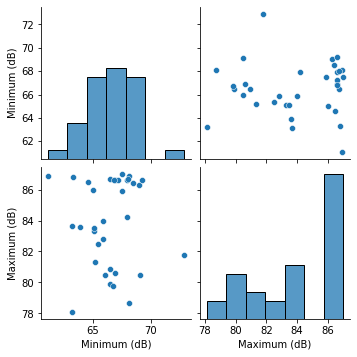

In [19]:
sns.pairplot(df);

In [20]:
df.columns

Index(['Minimum (dB)', 'Maximum (dB)'], dtype='object')

## <center>4. Linear Regression Algorithm <a class = "anchor" id = "chapter4"> </a></center>

**Splitting the data into training and testing sets**

In [21]:
X = df['Minimum (dB)']
y = df['Maximum (dB)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 29)


In [22]:
X_train.shape

(23,)

In [23]:
X_train = pd.DataFrame(X_train)

In [24]:
y_train = pd.DataFrame(y_train)

In [25]:
X_test = pd.DataFrame(X_test)

**Training the Linear Regression model**

In [26]:
lr = LinearRegression()

In [27]:
lr = lr.fit(X_train, y_train)

In [28]:
predicted = lr.predict(X_test)

**Visualising the Actual and Predicted Maximum Decibel**

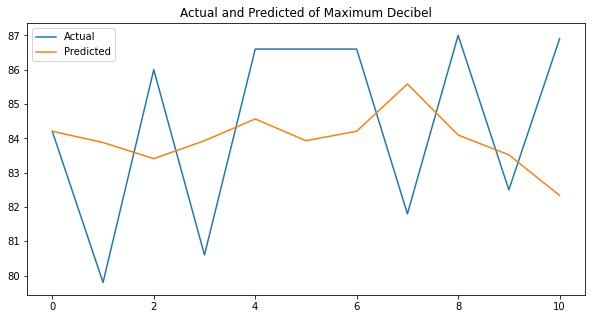

In [29]:
plt.figure(figsize = (10,5))

plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), predicted)

plt.legend(['Actual', 'Predicted'])
plt.title('Actual and Predicted of Maximum Decibel')

plt.show()

## <center>5. Evaluating the model <a class = "anchor" id = "chapter5"> </a></center>

In [30]:
print('The mean_squared_error is:: ', mean_squared_error(y_test, predicted))
print('The r2_score is:: ', r2_score(y_test, predicted))

The mean_squared_error is::  8.731419988685788
The r2_score is::  -0.2621578126191433


## <center>6. Conclusion <a class = "anchor" id = "chapter6"> </a></center>

In summary, the obtained MSE of 8.7314 indicates that there is room for improvement in the model's accuracy, and the negative R2 score of -0.2622 suggests that the model is performing worse than a basic mean prediction model. Further analysis and adjustments may be needed to enhance the model's performance and better understand the relationships between the variables.

# <center><font color='#000000'>Thank YOu<font><a class='anchor' id='top'></a></center>